<a href="https://colab.research.google.com/github/kuty2004/linear_algebra2/blob/main/python3_%EC%8B%A4%EC%8A%B56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

lamen = dict({'name':['쇠고기라면','해물라면','얼큰라면','떡라면','짬뽕라면','만두라면','치즈라면','된장라면','볶음라면','김치라면'],
              'noodle':[2,1,5,2,3,4,4,1,3,5],
              'bowl':[4,5,3,2,5,3,4,2,3,5],
              'soup':[5,1,4,3,5,2,3,1,2,3]})

lamen

lamen1=pd.DataFrame(lamen)
lamen1

,name,noodle,bowl,soup
0,쇠고기라면,2,4,5
1,해물라면,1,5,1
2,얼큰라면,5,3,4
3,떡라면,2,2,3
4,짬뽕라면,3,5,5
5,만두라면,4,3,2
6,치즈라면,4,4,3
7,된장라면,1,2,1
8,볶음라면,3,3,2
9,김치라면,5,5,3


In [3]:
#1.데이터분리
lamenEval=lamen1[['noodle','bowl','soup']]
lamenName=lamen1['name']

#2.스케일러로 값 변환
#scaling using StandardScaler

scaler=StandardScaler()
scaler.fit(lamenEval.values)
lamen_scaled=scaler.transform(lamenEval.values)
lamen_scaled.shape

#3.PCA 모델링
#-PCA.fit():주성분 찾음
#-PCA.transform():새로운 주성분으로 데이터변환
#PCA modeling
from sklearn.decomposition import PCA

pca_lamen=PCA()
pca_lamen.fit(lamen_scaled)

#data transfrom
X_pca_lamen=pca_lamen.transform(lamen_scaled)

#look into data shape
print("original data : {}".format(str(lamen_scaled.shape)))
print("transform data: {}".format(str(X_pca_lamen.shape)))

#출력 결과
#행 순서대로 pca1,pca2,pca3
#열은 각각 noodle,bowl,soup을 의미

original data : (10, 3)
transform data: (10, 3)


In [4]:
pca_lamen.components_

array([[-0.571511  , -0.52211611, -0.63306393],
       [-0.60447096,  0.78960694, -0.105526  ],
       [-0.5549685 , -0.32235949,  0.76687308]])

In [5]:
#PCA 1,2,3에 대한 변환 스코어
pc1=0
pc2=0
pc3=0

for j in range(len(pca_lamen.components_)):
  pc1 += pca_lamen.components_[0][j]*lamen_scaled[:,j] #계수 3개에 있어서 스케일된 모든 열을 다 곱하고 더한 것 = pc1
  pc2 += pca_lamen.components_[1][j]*lamen_scaled[:,j]
  pc3 += pca_lamen.components_[2][j]*lamen_scaled[:,j]

pc1 = pc1.reshape(10,1)
pc2 = pc2.reshape(10,1)
pc3 = pc3.reshape(10,1)

np.round(np.hstack((pc1,pc2,pc3)),3)==np.round(X_pca_lamen,3)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


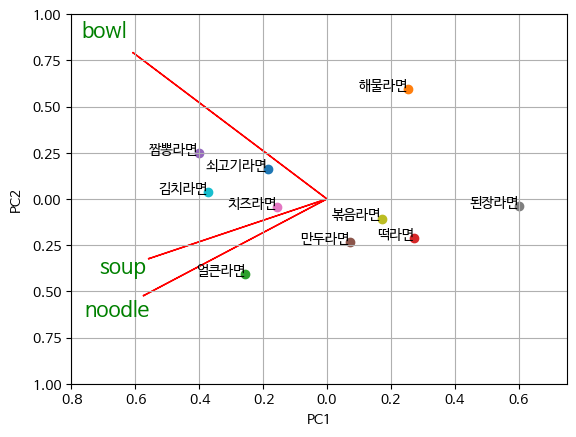

In [6]:
#시각적으로 확인하고 싶을 때
def biplot2(score,coeff,label,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs=score[:,pca1]
  ys=score[:,pca2]
  n=score.shape[1]
  scalex=1.0/(xs.max()-xs.min())
  scaley=1.0/(ys.max()-ys.min())

  for i in range(len(xs)):
    plt.scatter(xs[i]*scalex,ys[i]*scaley)
    plt.annotate(label.iloc[i],xy=(xs[i]*scalex,ys[i]*scaley),ha='right')

  for i in range(n):
    plt.arrow(0,0,coeff[i,pca1],coeff[i,pca2],color='r',alpha=1)
    if labels is None:
      plt.text(coeff[i,pca1]*1.15,coeff[i,pca2]*1.15,"Var"+str(i+1),color='g',ha='center',va='center')
    else:
      plt.text(coeff[i,pca1]*1.15,coeff[i,pca2]*1.15,labels[i],color='g',ha='center',va='center',size=15)
  plt.xlim(-0.8,0.75)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()

##한글 폰트 설정

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc("font",family='NanumBarunGothic')
%matplotlib inline
biplot2(X_pca_lamen,pca_lamen.components_,lamenName,1,2,labels=lamenEval.columns)



---



In [7]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()

K = 20
faces = faces_all.images[faces_all.target == K]

faces

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]],

       [[0.23553719, 0.35123968, 0.4338843 , ..., 0.45867768,
         0.446281  , 0.47107437],
        [0.21900827, 0.36363637, 0.4338843 , ..., 0.46694216,
         0.44214877, 0.46694216],
        [0.2520661 , 0.35123968, 0.4338843 , ..., 0.47933885,
         0.45041323, 0.46280992],
        ...,
        [0.3966942 , 0.5041322 , 0.62396693, ..., 0.21900827,
         0.07024793, 0.07024793],
        [0.5

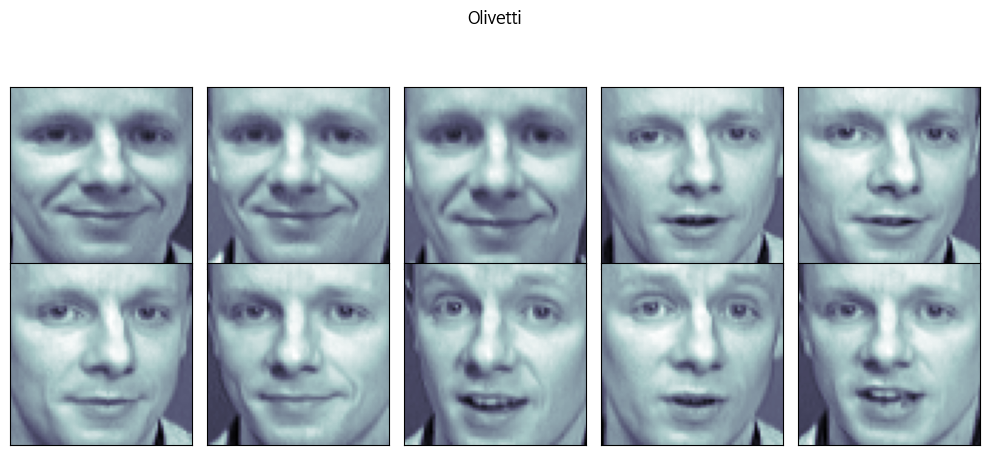

In [8]:
import matplotlib.pyplot as plt

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top = 1, bottom=0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
plt.suptitle("Olivetti")
plt.tight_layout()
plt.show()

- PCA 분석(2개의 주성분 선택)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = faces_all.data[faces_all.target==K]
W = pca.fit_transform(X)

X_inv = pca.inverse_transform(W)

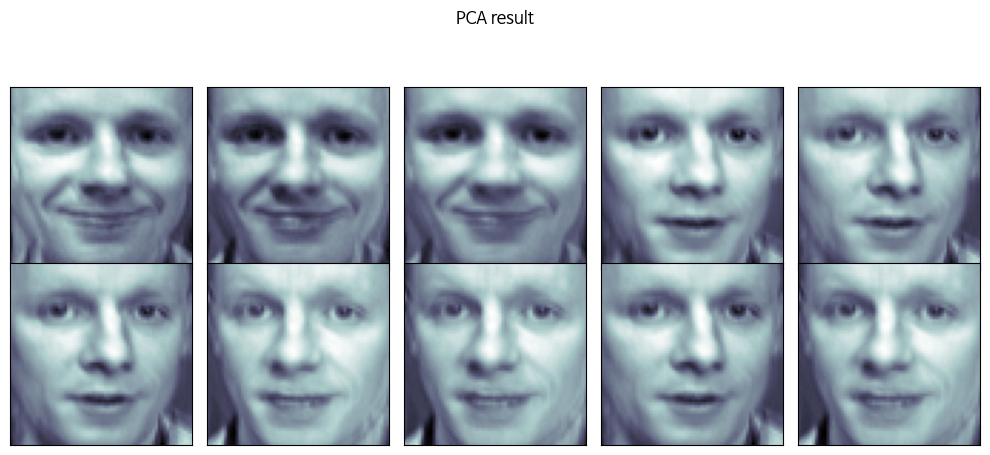

In [10]:
import matplotlib.pyplot as plt
def draw_faces(faces, N, M, title='', inv = False):
    fig = plt.figure(figsize=(10, 5))
    plt.subplots_adjust(top = 1, bottom=0, hspace=0, wspace=0.05)
    for n in range(N*M):
        ax = fig.add_subplot(N, M, n+1)
        if inv == False:
            ax.imshow(faces[n], cmap=plt.cm.bone)
        else:
            ax.imshow(faces[n].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
draw_faces(X_inv, 2, 5, 'PCA result', True)

- 원점과 두 개의 eigen face

  10장의 사진은 아래 3장으로 모두 표현할 수 있다.




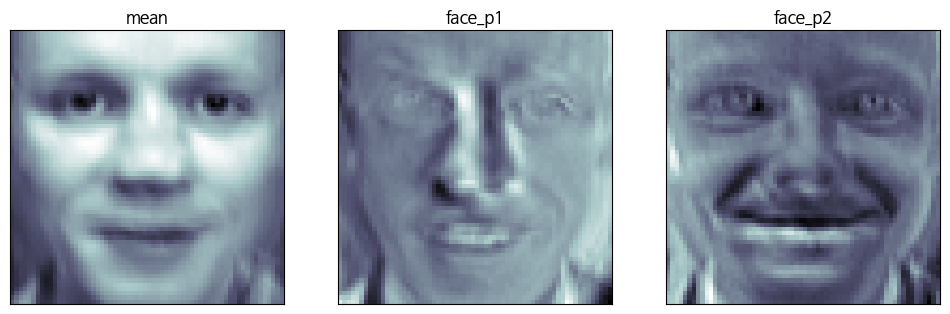

In [11]:
face_mean = pca.mean_.reshape(64, 64)
face_p1 = pca.components_[0].reshape(64, 64)
face_p2 = pca.components_[1].reshape(64, 64)

plt.figure(figsize=(12, 7))
plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('mean')
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('face_p1')
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('face_p2')
plt.show()

가중치 선정

In [12]:
import numpy as np

N = 2
M = 5
w = np.linspace(-5, 10, N*M)
w

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

첫 번째 성분 변화

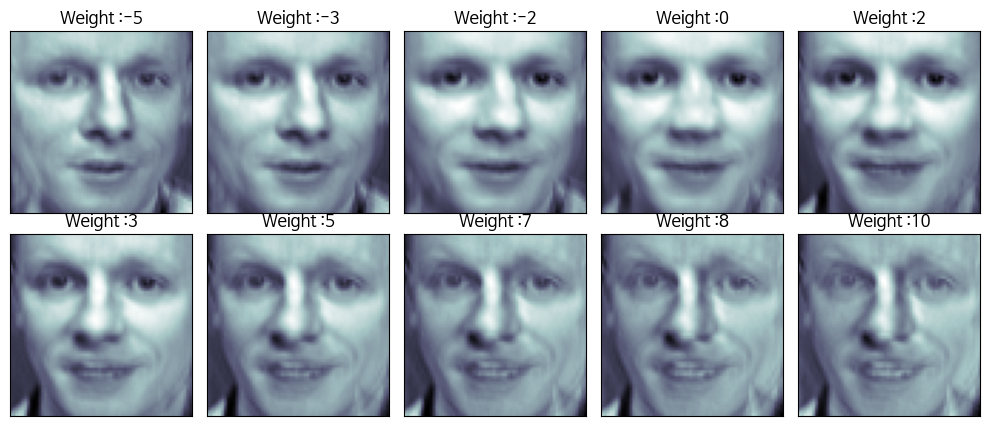

In [13]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p1, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([]);
    plt.title('Weight :' + str(round(w[n])))

plt.tight_layout()
plt.show()

두 번째 성분 변화

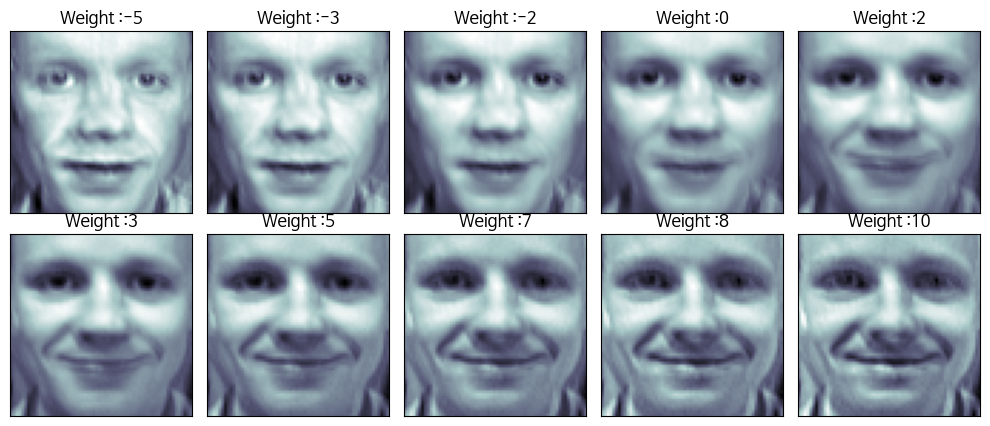

In [14]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p2, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([]);
    plt.title('Weight :' + str(round(w[n])))

plt.tight_layout()
plt.show()

두 개의 성분 표현

In [15]:
nx, ny = (5, 5)

x = np.linspace(-5, 8, nx)
y = np.linspace(-5, 8, ny)
w1, w2 = np.meshgrid(x, y)
w1, w2

(array([[-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ]]),
 array([[-5.  , -5.  , -5.  , -5.  , -5.  ],
        [-1.75, -1.75, -1.75, -1.75, -1.75],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ],
        [ 4.75,  4.75,  4.75,  4.75,  4.75],
        [ 8.  ,  8.  ,  8.  ,  8.  ,  8.  ]]))

shape 조정

In [16]:
w1.shape

(5, 5)

In [17]:
w1 = w1.reshape(-1, )
w2 = w2.reshape(-1, )
w1.shape

(25,)

재합성

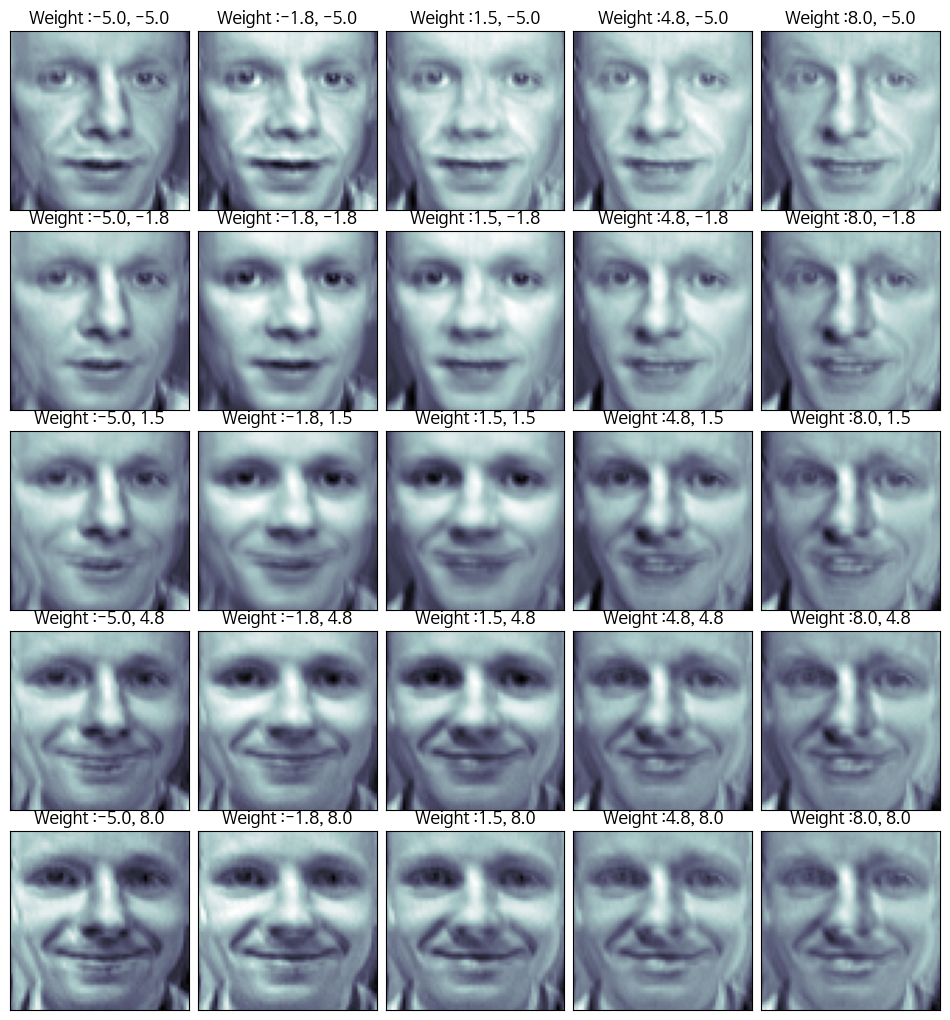

In [18]:
fig = plt.figure(figsize=(12, 10))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

N = 5
M = 5

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w1[n] * face_p1 + w2[n] * face_p2, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([]);
    plt.title('Weight :' + str(round(w1[n], 1)) + ', ' + str(round(w2[n], 1)))

plt.show()



---



Iris data set : 150 records with 5 attributes

First 5 records in iris data
    sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

First principal axis: [ 0.52237162 -0.26335492  0.58125401  0.56561105]
Second principal axis: [0.37231836 0.92555649 0.02109478 0.06541577]

First 5 Transformed records
    principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777        

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


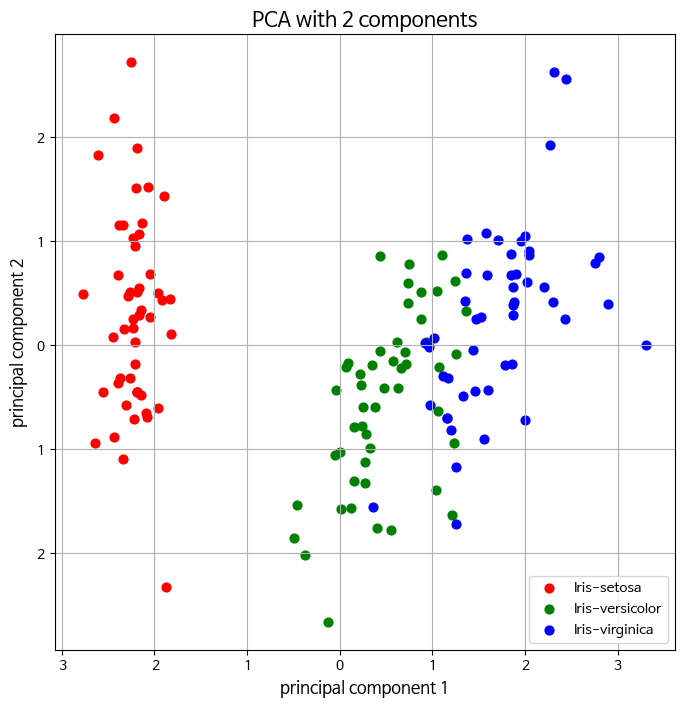

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# iris 데이터의 위치 URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Pandas DataFrame으로 읽어들이기
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

nrow, ncol = df.shape
print("Iris data set :", nrow, "records with", ncol, "attributes\n")
print("First 5 records in iris data\n", df.head(5))
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values # 데이터의 속성값
y = df.loc[:,['target']].values # 데이터의 부류
x = StandardScaler().fit_transform(x) # 평균 0, 분산 1인 데이터로 변환

pca = PCA(n_components=2) # PCA를 적용하여 2개의 주성분만 추출
principalComponents = pca.fit_transform(x)
# 주성분 축 2개를 이용하여 2차원 데이터로 변환
print("\nFirst principal axis:", pca.components_[0])
print("Second principal axis:", pca.components_[1])

principalDf = pd.DataFrame(data = principalComponents,
              columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

print("\nFirst 5 Transformed records\n", finalDf.head(5))
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize = 12)
ax.set_ylabel('principal component 2', fontsize = 12)
ax.set_title('PCA with 2 components', fontsize = 15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # iris 데이터의 부류 이름
colors = ['r', 'g', 'b'] # 부류별로 지정된 색상
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
      , finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 40)
ax.legend(targets)
ax.grid()
fig.show()


## 0. Import libraries

In [20]:
import numpy as np
import numpy.linalg as npl      # linear algebra
import matplotlib.pyplot as plt

## < eigen values & eigen vectors of A >
$ Au = λu$

In [21]:
A = np.array([[4, 2], [1, 3]])  #np.vstack([[4,2],[1,3]])
print ("A:")
print (A, "\n")

e_values, e_vectors = npl.eig(A)
print ("A의 고윳값 = ", e_values)
print ("A의 고유벡터 = ", e_vectors)

# eigen vector u1, u2
u1 = np.vstack(e_vectors[:,0])
u2 = np.vstack(e_vectors[:,1])
print ("u1: ", u1)
print ("u2: ", u2)

# eigen value lambda1, lambda2
l1, l2 = e_values[0], e_values[1]
print ("eigen values: ", l1,l2, "\n")

# Check
print ("Au1: ", np.dot(A, u1))
print ("l1*u1: ", l1*u1)

print ("Au2: ", np.dot(A, u2))
print ("l2*u2: ", l2*u2)

A:
[[4 2]
 [1 3]] 

A의 고윳값 =  [5. 2.]
A의 고유벡터 =  [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
u1:  [[0.89442719]
 [0.4472136 ]]
u2:  [[-0.70710678]
 [ 0.70710678]]
eigen values:  5.0 2.0 

Au1:  [[4.47213595]
 [2.23606798]]
l1*u1:  [[4.47213595]
 [2.23606798]]
Au2:  [[-1.41421356]
 [ 1.41421356]]
l2*u2:  [[-1.41421356]
 [ 1.41421356]]


In [ ]:
B = np.array([[5,2,0], [2,5,0], [-3,4,6]])
w2, V2 = np.linalg.eig(B) # B의 고윳값과 고유벡터 계산

print("\nB의 고윳값 = ", w2)
print("B의 고유벡터 = ", V2)


B의 고윳값 =  [6. 7. 3.]
B의 고유벡터 =  [[ 0.          0.57735027  0.36650833]
 [ 0.          0.57735027 -0.36650833]
 [ 1.          0.57735027  0.85518611]]


## < PCA >
### 0) Import libraries

In [22]:
#import numpy as np
#import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

### 1) Download Iris dataset

In [23]:
# iris 데이터의 위치 URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Pandas DataFrame으로 읽어들이기
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

nrow, ncol = df.shape
print("Iris data set :", nrow, "records with", ncol, "attributes\n")
print("First 5 records in iris data\n", df.head(5))
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values # 데이터의 속성값
y = df.loc[:,['target']].values # 데이터의 부류
x = StandardScaler().fit_transform(x) # 평균 0, 분산 1인 데이터로 변환

Iris data set : 150 records with 5 attributes

First 5 records in iris data
    sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### 2) PCA

In [24]:
pca = PCA(n_components=2) # PCA를 적용하여 2개의 주성분만 추출
principalComponents = pca.fit_transform(x)
# 주성분 축 2개를 이용하여 2차원 데이터로 변환
print("\nFirst principal axis:", pca.components_[0])
print("Second principal axis:", pca.components_[1])

principalDf = pd.DataFrame(data = principalComponents,
              columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

print("\nFirst 5 Transformed records\n", finalDf.head(5))


First principal axis: [ 0.52237162 -0.26335492  0.58125401  0.56561105]
Second principal axis: [0.37231836 0.92555649 0.02109478 0.06541577]

First 5 Transformed records
    principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa


### 3) Plot Iris dataset on the 2 components

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


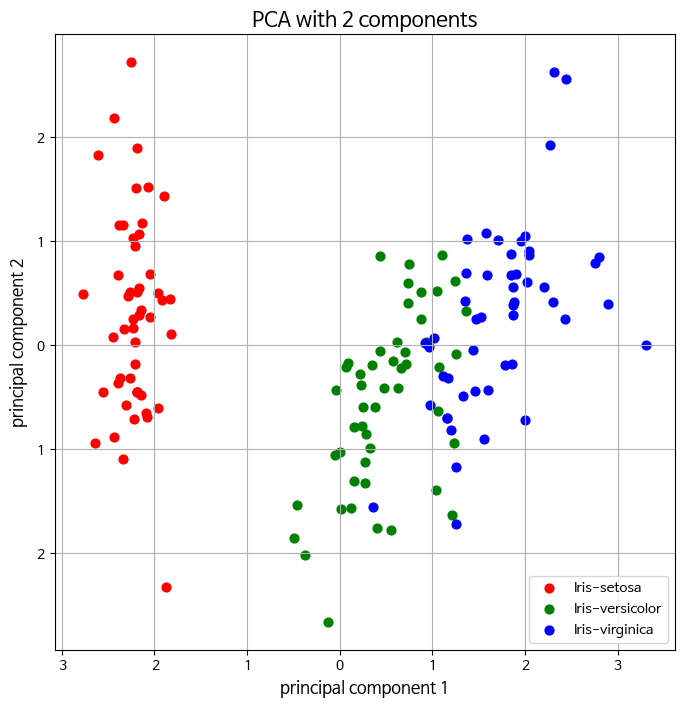

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize = 12)
ax.set_ylabel('principal component 2', fontsize = 12)
ax.set_title('PCA with 2 components', fontsize = 15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # iris 데이터의 부류 이름
colors = ['r', 'g', 'b'] # 부류별로 지정된 색상
for target, color in zip(targets,colors):
    # target 에 해당하는 인덱스 가져오기
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
      , finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 40)
ax.legend(targets)
ax.grid()
fig.show()